<a href="https://colab.research.google.com/github/HectorDelgadoJ/Complejidad-de-Datos-/blob/main/ComplejidaddeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complejidad de Datos

En este análisis, se utiliza el Wine Dataset para aplicar técnicas de preprocesamiento y balanceo de clases con el objetivo de mejorar la precisión del modelo de clasificación. Usaremos SMOTE para equilibrar las clases, entrenaremos un modelo de árbol de decisión y evaluaremos su rendimiento para observar el impacto del balanceo en la predicción.

* ##  Importar las Bibliotecas Necesarias
Primero, vamos a importar las bibliotecas que utilizaremos: pandas para manejar el dataset, train_test_split de sklearn para dividir los datos, y SMOTE para balancear las clases.

In [ ]:
# Importamos pandas para la manipulación de datos y numpy para operaciones numéricas.
import pandas as pd
import numpy as np

# Importamos train_test_split para dividir los datos en entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Importamos SMOTE para balancear las clases.
from imblearn.over_sampling import SMOTE

# Importamos DecisionTreeClassifier como modelo de ejemplo.
from sklearn.tree import DecisionTreeClassifier

# Importamos metrics para evaluar el desempeño del modelo.
from sklearn.metrics import classification_report


*  ## Cargar el Wine Dataset
Usamos sklearn.datasets para cargar el Wine Dataset. Como este es un dataset integrado en Scikit-Learn, no necesitas descargarlo manualmente.

In [ ]:
from sklearn.datasets import load_wine

# Cargamos el Wine Dataset de sklearn.
wine = load_wine()

# Convertimos el dataset a un DataFrame de pandas para facilitar la manipulación.
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Agregamos la columna de la clase (etiquetas).
df.head()  # Mostramos las primeras filas del dataset para verificar.


* ## Explorar los Datos y Contar Clases
Es útil ver cuántas instancias hay en cada clase para entender el desbalance.

In [ ]:
# Contamos cuántas instancias tiene cada clase.
print("Conteo de clases antes del balanceo:")
print(df['target'].value_counts())


* ## Dividir el Dataset en Entrenamiento y Prueba
Dividimos el dataset para tener datos de entrenamiento y prueba.

In [ ]:
# Dividimos el dataset en entrenamiento (80%) y prueba (20%).
X = df.drop('target', axis=1)  # Variables predictoras.
y = df['target']  # Etiquetas.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* ## Aplicar SMOTE para Balancear las Clases
SMOTE generará ejemplos sintéticos en las clases minoritarias.

In [ ]:
# Aplicamos SMOTE para balancear las clases en el conjunto de entrenamiento.
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificamos el conteo de clases después del balanceo.
print("Conteo de clases después del balanceo:")
print(pd.Series(y_train_bal).value_counts())


* ##  Entrenar un Modelo de Clasificación
Usamos un árbol de decisión como modelo de ejemplo para entrenar el dataset balanceado.

In [ ]:
# Entrenamos el modelo en los datos balanceados.
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)


* ## Evaluar el Modelo
Realizamos predicciones sobre el conjunto de prueba y evaluamos el rendimiento del modelo.

In [ ]:
# Realizamos predicciones en el conjunto de prueba.
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación para evaluar el modelo.
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


El codigo completo nos quedaria de la siguinete forma:

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine

# Cargar y preparar el Wine Dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Mostrar conteo de clases antes del balanceo
print("Conteo de clases antes del balanceo:")
print(df['target'].value_counts())

# Dividir el dataset
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Mostrar conteo de clases después del balanceo
print("Conteo de clases después del balanceo:")
print(pd.Series(y_train_bal).value_counts())

# Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

# Evaluar el modelo
y_pred = model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


El resultado que obtenemos al compilar es el siguiente: 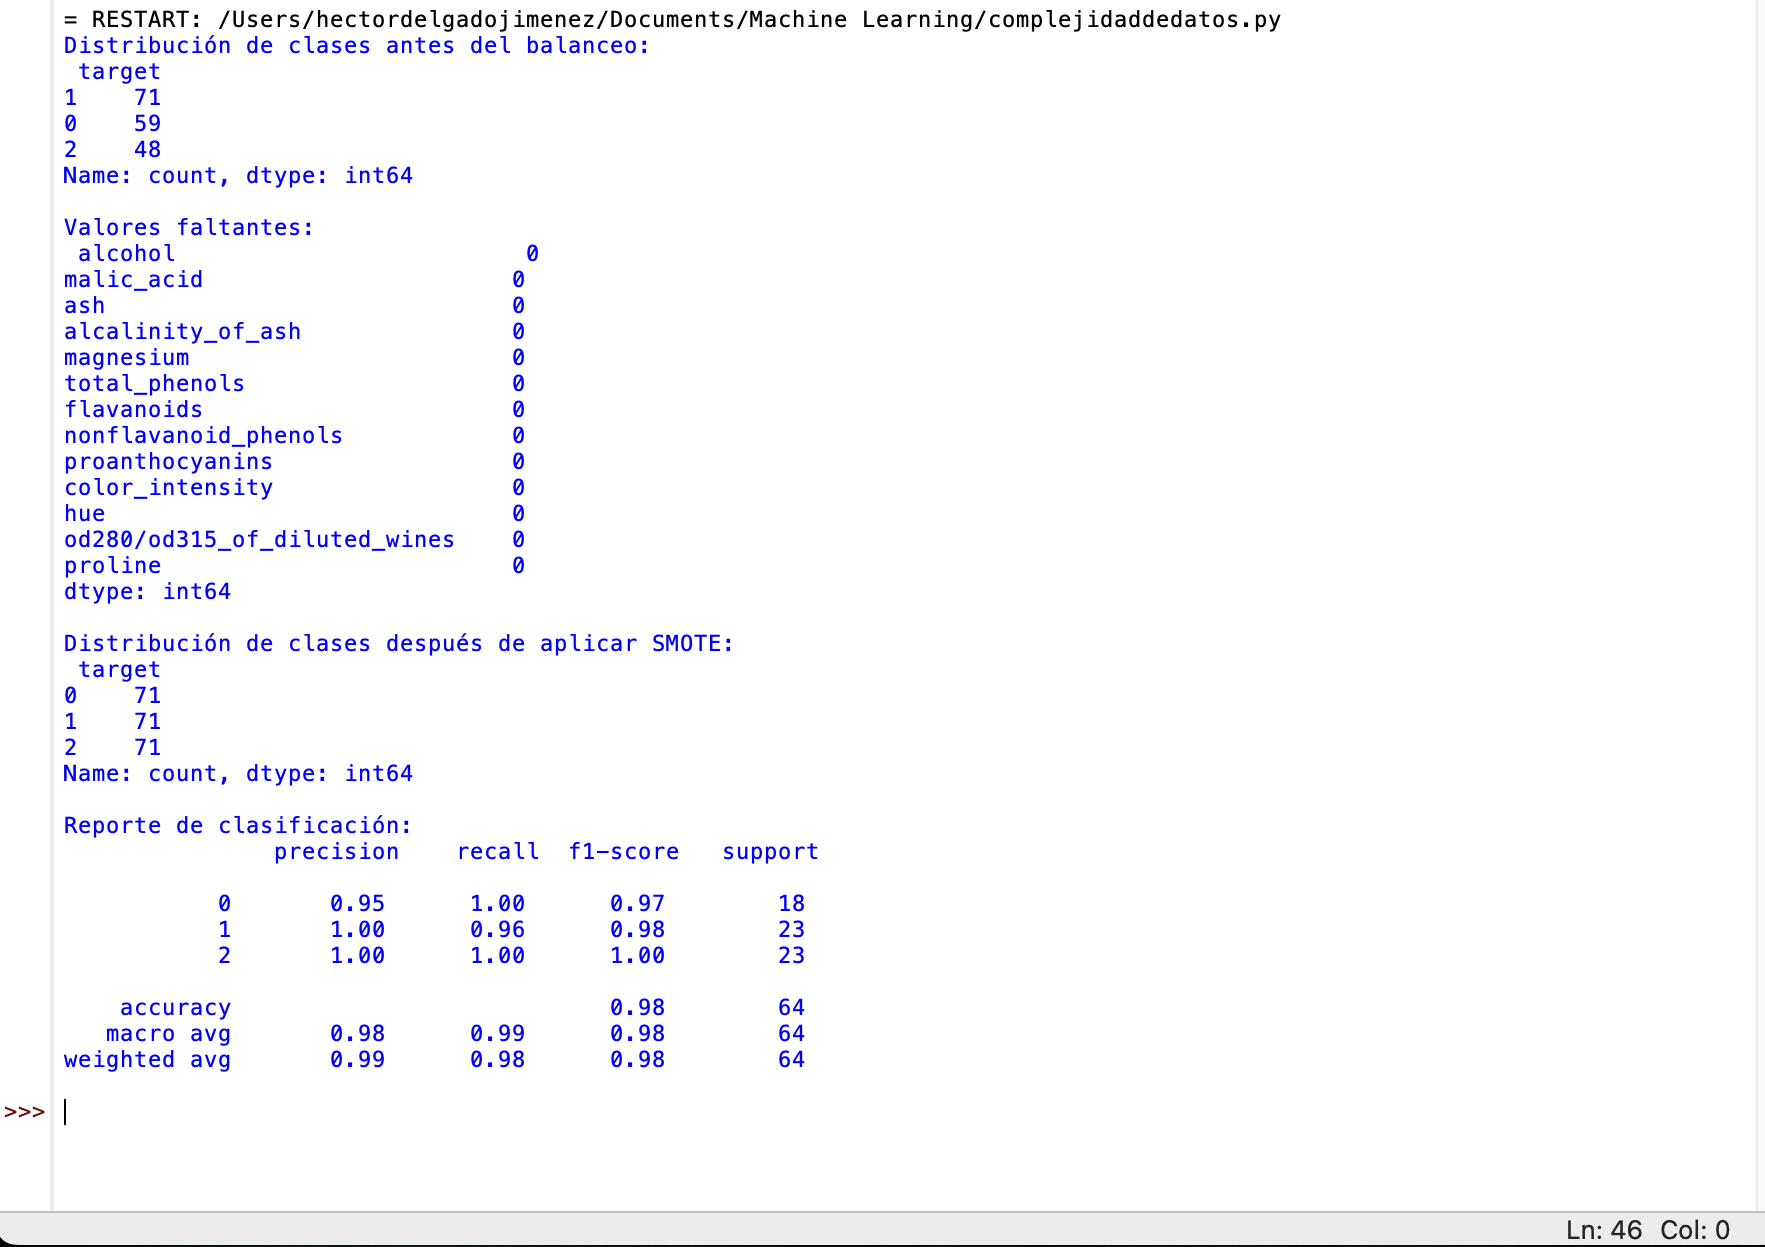